# Hear is the Titanic Prediction.
a learning for the use of kaggle and pratict for my course in coursera-IBM Data Science

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_all = df_train.append(df_test,ignore_index=True,sort=False)
df_train = df_all[0:891]
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_all.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
missing_data = df_all.isnull()
for column_name in missing_data.columns.values.tolist():
    print(column_name,'\n',missing_data[column_name].value_counts())

PassengerId 
 False    1309
Name: PassengerId, dtype: int64
Survived 
 False    891
True     418
Name: Survived, dtype: int64
Pclass 
 False    1309
Name: Pclass, dtype: int64
Name 
 False    1309
Name: Name, dtype: int64
Sex 
 False    1309
Name: Sex, dtype: int64
Age 
 False    1046
True      263
Name: Age, dtype: int64
SibSp 
 False    1309
Name: SibSp, dtype: int64
Parch 
 False    1309
Name: Parch, dtype: int64
Ticket 
 False    1309
Name: Ticket, dtype: int64
Fare 
 False    1308
True        1
Name: Fare, dtype: int64
Cabin 
 True     1014
False     295
Name: Cabin, dtype: int64
Embarked 
 False    1307
True        2
Name: Embarked, dtype: int64


As we can see the **Age Fare Cabin and Embarked** have null rows, we should make some deal with them when handle with that column.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I think the **name**,**PassengerId**,**Ticket**,column is useless.<br>
Name and PassengerId is just a NO. without mean. I have seen all of the Ticket message but it seem like that the prefix is an important message,but only little of tickets with prefix. <br>

The **Cabin** is an important variables ,but a bunch of values are dismiss.<br>
So I drop them.

In [7]:
## Before drop the column ,should get off the Survived column.
df_Survived = df_all[['Survived']]
df_Survived_train = df_Survived[0:891]
df_all = df_all.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)

Now have a look of **Embarked**<br>
As my think. The place where passengers get on board are random.So passengers in each pclass aboard in each port would distributed similar.

In [8]:
df_all.groupby('Embarked').size()

Embarked
C    270
Q    123
S    914
dtype: int64

In [9]:
gb_Embarked_co_Pclass_value_counts = df_all.groupby('Embarked')['Pclass'].value_counts()
type(gb_Embarked_co_Pclass_value_counts)

pandas.core.series.Series

In [10]:
gb_Embarked_co_Pclass_value_counts.sum(level='Embarked')

Embarked
C    270
Q    123
S    914
Name: Pclass, dtype: int64

In [11]:
def show_ratio_of_group(gb):
    port_sum_value = gb.sum(level='Embarked')
    dit = {}
    for index in gb.index:
        dit[index] = round(gb[index]/port_sum_value[index[0]],4)
    return dit

ratio_gb_Embarked_co_Pclass_value = show_ratio_of_group(gb_Embarked_co_Pclass_value_counts)
ratio_gb_Embarked_co_Pclass_value

{('C', 1): 0.5222,
 ('C', 3): 0.3741,
 ('C', 2): 0.1037,
 ('Q', 3): 0.9187,
 ('Q', 2): 0.0569,
 ('Q', 1): 0.0244,
 ('S', 3): 0.5416,
 ('S', 2): 0.2648,
 ('S', 1): 0.1937}

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

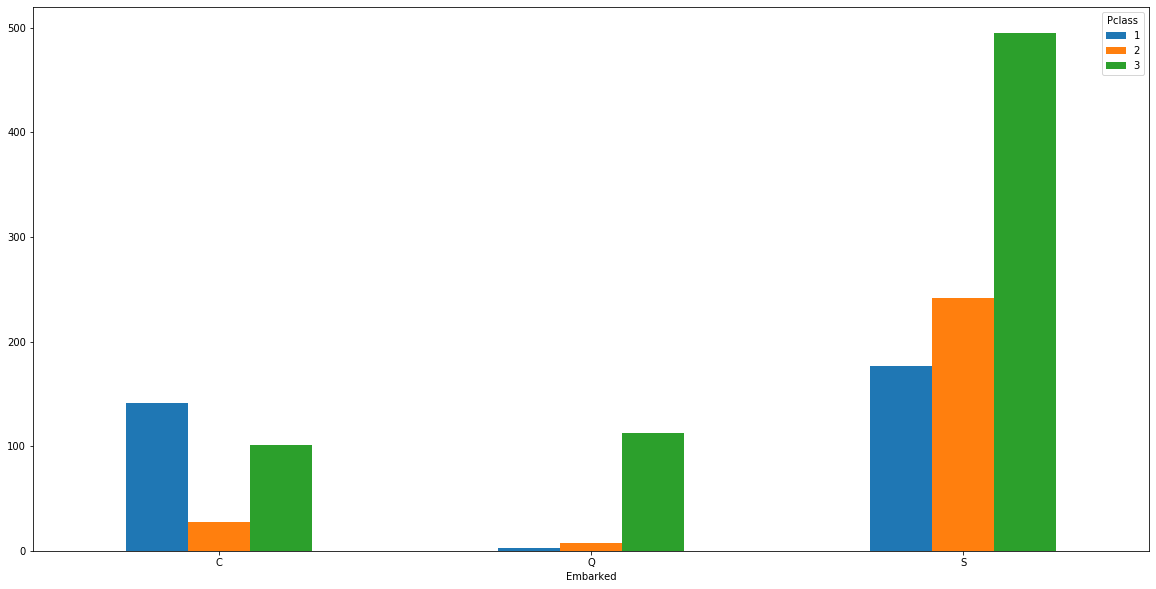

In [12]:
gb_Embarked_co_Pclass_value_counts.unstack().plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=360)

I'm wrong. There were great ratio of pclass == 1 passengers get aboard from Cherbourg,more pclass==3 passangers get aboard in Queenstown and more pclass == 3 passangers get aboard in Southampton

Now we should handle with the **category variables**.

The **Sex** and **Embarked** columns should change to be numberic.<br>
First of all ,to see whether there are only two object in sex column.

In [13]:
df_all.groupby('Sex').size()

Sex
female    466
male      843
dtype: int64

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(['female','male'])
df_all['Sex'] = encoder.transform(df_all['Sex'])

In [15]:
df_all.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


Before transform the Embarked to numerical,we should handle with the nan value.<br>
As we can see above,there were 914 passengers get aboard from Southampton.And the nan values is just 2.Here we give this two nan value to S.

In [16]:
df_all['Embarked'].replace(np.nan,'S',inplace=True)

In [17]:
encoder.fit(['S','C','Q'])
df_all['Embarked'] = encoder.transform(df_all['Embarked'])
df_all.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


**SibSp** is the count of siblings or spouses aboard the Titanic<br>
**Parch** is the count of parent of children aboard the Titanic<br>
Use **z-test** to find the relation between this two varaibles.<br>
My hypothesis is they have similarity positive or nagative impact on survived.<br>
But before that,I want to create a new column which composite of the SibSp*Survived and Parch*Survived when Survived is 1 ,in this math it will be 1 ,and when Survived is 0 ,in this math it will be -1.

In [41]:
df_train.shape

(891, 12)

In [42]:
sib_sp = np.array(df_train[df_Survived['Survived'] == 1]['SibSp'])
par_ch = np.array(df_train[df_Survived['Survived'] == 1]['Parch'])

/home/mkelar/miniconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/mkelar/miniconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [43]:
par_ch[0:20]

array([0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2])

In [82]:
survived_array = np.array(df_Survived_test['Survived'].apply(func=lambda x:1 if x == 1 else -1))
sib_sp_sur = np.array(df_train['SibSp'])*survived_array
par_ch_sur = np.array(df_train['Parch'])*survived_array

In [93]:
survived_array = df_Survived_test['Survived'].apply(func=lambda x:1 if x == 1 else -1)
sib_sp_sur = df_train['SibSp']*survived_array
par_ch_sur = df_train['Parch']*survived_array

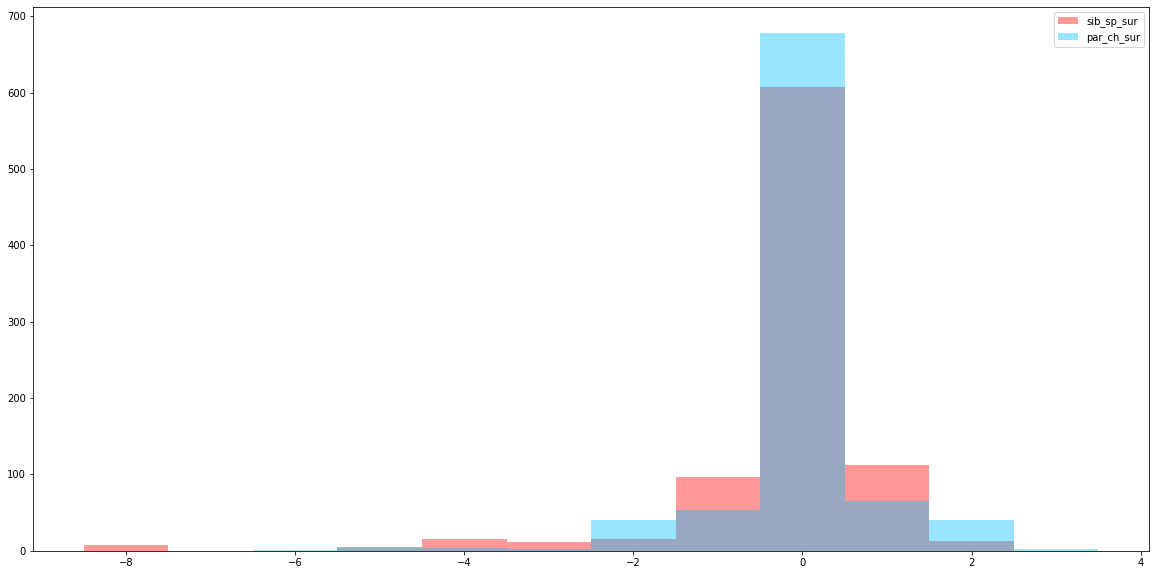

In [123]:
def pic_distribute_ndarray(arr,label1,arr2,label2):
    plt.figure(figsize=(20,10))
    bins1 = [x-0.5 for x in range(min(arr),max(arr))]
    plt.hist(arr,bins=bins1,color='#FF0000',alpha=0.4,label=label1)
    
    bins2 = [x-0.5 for x in range(min(arr2),max(arr2))]
    plt.hist(arr2,bins=bins2,color='#00BFFF',alpha=0.4,label=label2)
    
    plt.legend(loc='upper right')
    plt.show()
pic_distribute_ndarray(sib_sp_sur,'sib_sp_sur',par_ch_sur,'par_ch_sur')

In [56]:
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests

In [57]:
ttest,pval = ttest_ind(sib_sp,par_ch)
print(ttest,pval)

0.15482855192790262 0.877002290172074


In [58]:
ttest,pval = stests.ztest(sib_sp,par_ch,value=0)
print(ttest,pval)

0.15482855192790262 0.8769564814417383


In [59]:
ttest,pval = ttest_ind(sib_sp_sur,par_ch_sur)
print(ttest,pval)

-2.6745464644283237 0.007551528418888609


In [60]:
ttest,pval = stests.ztest(sib_sp_sur,par_ch_sur)
print(ttest,pval)

-2.6745464644283237 0.0074830405953301374


In [61]:
print("the mean of sib_sp_sur and par_ch_sur is:{} {} ".format(np.mean(sib_sp_sur),np.mean(par_ch_sur)))

the mean of sib_sp_sur and par_ch_sur is:-0.15937149270482603 -0.024691358024691357 


In [66]:
sib_sp_sur = np.array(df_train[(df_Survived_train['Survived'] == 1) & (df_train['SibSp'] > 0)]['SibSp'])
par_ch_sur = np.array(df_train[(df_Survived_train['Survived'] == 1) & (df_train['Parch'] > 0)]['Parch'])
sib_sp_not_sur = np.array(df_train[(df_Survived_train['Survived'] == 0) & (df_train['SibSp'] > 0)]['SibSp'])
par_ch_not_sur = np.array(df_train[(df_Survived_train['Survived'] == 0) & (df_train['Parch'] > 0)]['Parch'])

In [67]:
print("survived with sibsp is:{} and not survived is:{};\n survived with parchc is: {} and not survived is:{}".format(len(sib_sp_sur),len(sib_sp_not_sur),len(par_ch_sur),len(par_ch_not_sur)))

survived with sibsp is:132 and not survived is:151;
 survived with parchc is: 109 and not survived is:104


As the z-test between sib_sp_sur and par_ch_sur,We can make a point that:The posibility of with parents or childrens on the board is similar to the posibility with siblings or spouses on the board.<br>

So we sum this two values as families and drop this two column off.

In [109]:
df_all['families'] = df_all['SibSp'] + df_all['Parch']

In [110]:
df_all.drop(['SibSp','Parch'],inplace=True,axis=1)

In [111]:
df_all.head()

,Pclass,Sex,Age,Fare,Embarked,families
0,3,1,22.0,7.2500,2,1
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,0
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0


There are Age and Fare have not handle. Let's have a look of their distribute.<br>
Before plot the figure,we should handle the NAN value.

I thint set the mean to **NAN** for Age and Fare columns are both suitable.

In [124]:
Age_mean = df_all['Age'].mean(axis=0)
df_all['Age'].replace(np.nan,Age_mean,inplace=True)
Age_mean

29.881137667304014

In [125]:
Fare_mean = df_all['Fare'].mean(axis=0)
df_all['Fare'].replace(np.nan,Fare_mean,inplace=True)
Fare_mean

33.29547928134557

Let's plot them.

In [160]:
df_Age_Sur = df_all[df_Survived['Survived'] == 1][['Age']]
df_Age_unSur = df_all[df_Survived['Survived'] == 0][['Age']]

df_Fare_Sur = df_all[df_Survived['Survived'] == 1][['Fare']]
df_Fare_unSur = df_all[df_Survived['Survived'] == 0][['Fare']]

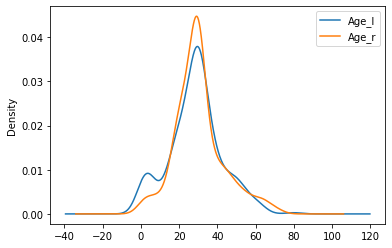

In [161]:
def pic_distribute_density(df1,df2):
    df1.reset_index(inplace=True,drop=True)
    df2.reset_index(inplace=True,drop=True)
    df_temp = df1.join(df2,lsuffix='_l',rsuffix='_r')
    df_temp.plot.kde()
#     print(df_temp.head())
    
pic_distribute_density(df_Age_Sur,df_Age_unSur)

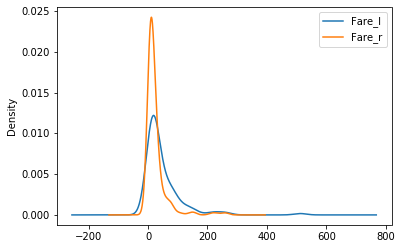

In [162]:
pic_distribute_density(df_Fare_Sur,df_Fare_unSur)

We can konw from this two figure: passenger survived or unsurvived in age distribution is so **sililar**; And in a low age interval **[0,10]**,passenger were more survived.<br>
But there more passenger **unsurvived** in **low fare**.

After the clean of data,we can model this data and use jaccard to test the accuracy.<br>
In this time ,I use the **K-NN,Logistic Regression and SVM**.

Now we begin to <font size="6">**model**</font> the data.

First,split the data into two set,the train and test set.

In [163]:
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV

In [164]:
df_all.head()

,Pclass,Sex,Age,Fare,Embarked,families
0,3,1,22.0,7.2500,2,1
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,0
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0


In [184]:
df_train = df_all[0:891]

In [183]:
df_survived = df_Survived[0:891]
df_survived = np.array(df_survived['Survived'])

In [185]:
df_train,df_test,survived_train,survived_test = train_test_split(df_train,df_survived,test_size=0.3,random_state=5)

### K-NN

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
parameters = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}
neighbor = KNeighborsClassifier()
clf = GridSearchCV(neighbor,parameters,cv = 3)
clf.fit(df_train,survived_train)

/home/mkelar/miniconda3/envs/python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
clf.best_estimator_ 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<font size="4">**Test**</font> the test data set

In [191]:
from sklearn import metrics

In [192]:
def metric_print(y,yhat):
    print('data set metrics is: ',metrics.accuracy_score(y,yhat))

In [195]:
metric_print(survived_test,clf.predict(df_test))

data set metrics is:  0.7052238805970149


**Plot** the confusion matrix

In [234]:
def plot_confusion_matrix(y_true, y_pred,
                          xlabel,ylabel,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=xlabel, yticklabels=ylabel,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

    

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    
    ax.set(title=title,
           xticklabels=xlabel, 
           yticklabels=ylabel,
           ylabel='True label',
           xlabel='Predicted label',
           xticks=[0,1]
          )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Confusion matrix, without normalization
[[137  30]
 [ 49  52]]


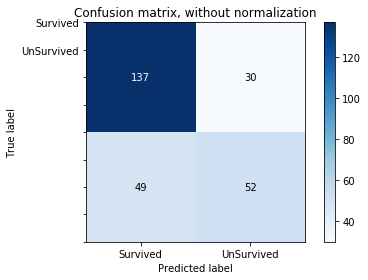

In [235]:
plot_confusion_matrix(survived_test,clf.predict(df_test),['Survived','UnSurvived'],['Survived','UnSurvived'])

### LogisticRegression

In [236]:
from sklearn.linear_model import LogisticRegression

In [244]:
parameters_lr = {'C':[0.0001,0.001,0.01,0.1,1,10],'solver':['lbfgs']}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr,parameters_lr,cv = 3)

In [245]:
clf_lr.fit(df_train,survived_train)

/home/mkelar/miniconda3/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [246]:
clf_lr.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
metric_print(survived_test,clf_lr.predict(df_test))

data set metrics is:  0.8134328358208955


Confusion matrix, without normalization
[[151  16]
 [ 34  67]]


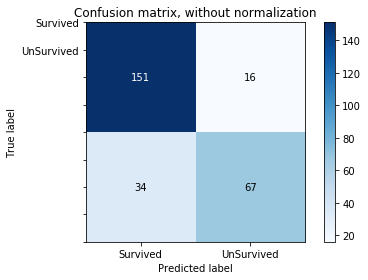

In [256]:
plot_confusion_matrix(survived_test,clf_lr.predict(df_test),['Survived','UnSurvived'],['Survived','UnSurvived'])

## SVM

In [250]:
from sklearn.svm import SVC

In [252]:
clf_svm = SVC(gamma='auto').fit(df_train,survived_train)

In [253]:
metric_print(survived_test,clf_svm.predict(df_test))

data set metrics is:  0.7238805970149254


Confusion matrix, without normalization
[[153  14]
 [ 60  41]]


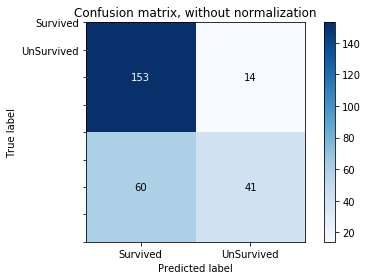

In [255]:
plot_confusion_matrix(survived_test,clf_svm.predict(df_test),['Survived','UnSurvived'],['Survived','UnSurvived'])

After compare of this three models,I desice to use the LogisticRegression model

In [258]:
y_predict = clf_lr.predict(df_all[891:])

In [265]:
y_predict = y_predict.astype(int)
y_predict[0:5]

array([0, 0, 0, 0, 1])

In [268]:
np.savetxt('predict.csv',y_predict,delimiter=',',fmt='%d')